# **Pyramidal Morphology described as Probability Clouds**


<div>
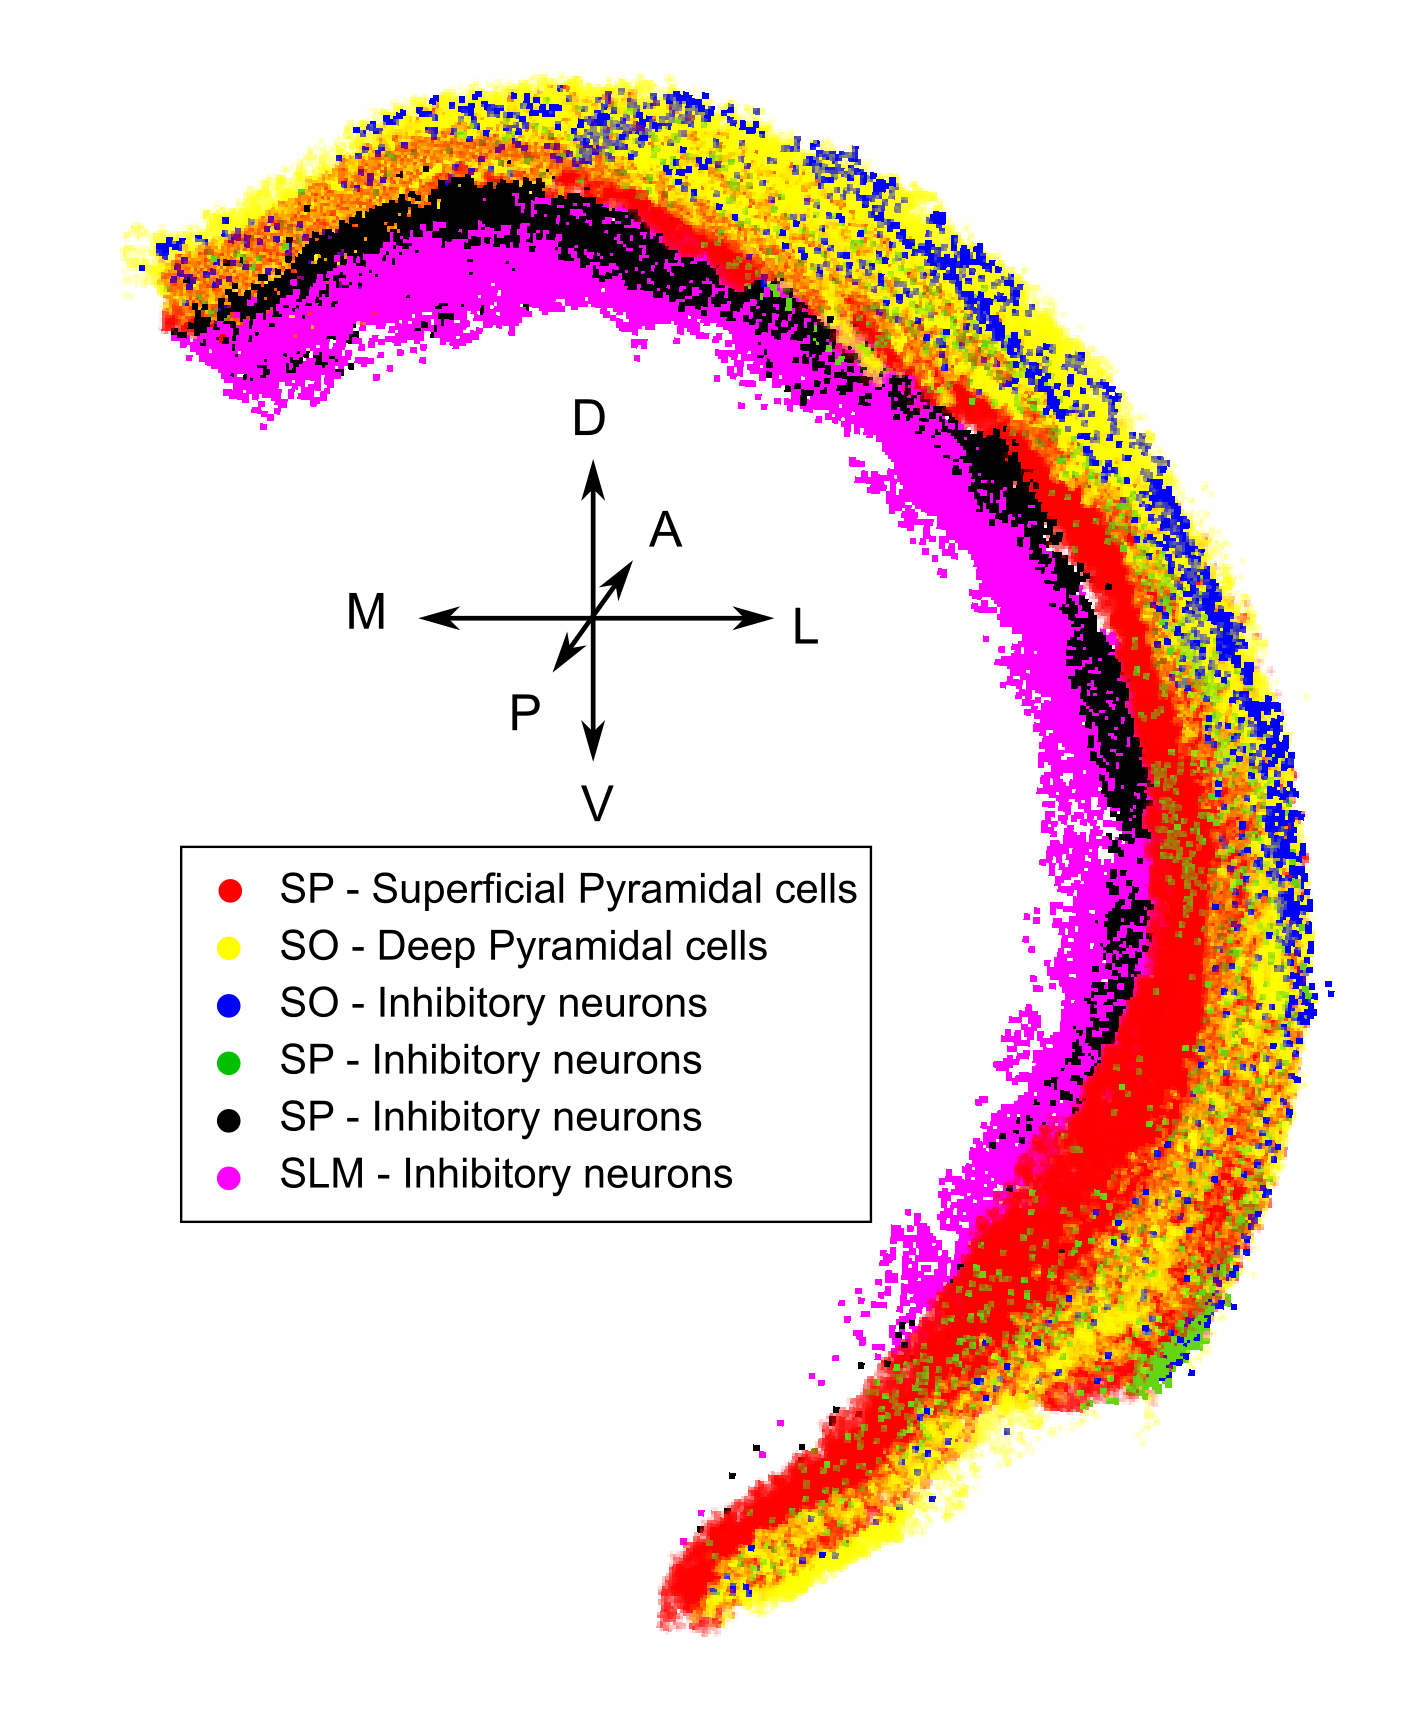
</div>

**Fig 1.** Excitatory and inhibitory cell placements according to 
the CA1 region layer subdivision provided by the Blue Brain cell Atlas.

###  Morphological descriptions of axons and dendrites

In our approach, the rule to generate a connection between any two neurons was implemented assuming that neuronal classes are characterized by specific morphological properties.

These properties have been modeled as combinations of **ellipsoids** and **cones** mimicking the cross-section volume of pre-synaptic **axons** and post-synaptic **dendrites** .

In general, the probability cloud <u> eigenvalue </u>  parametrization depended on the relative <u> distances </u> between each cell soma location and its CA1 targeting subregion while the probability cloud <u> eigenvectors </u> parametrization depended on the relative <u> orientations </u> between each soma location and its CA1 targeting subregion.

All cells were associated with their relative distances from CA3 and from Subiculum, in order to consider the experimentally observed preferential orientation of PC axons along the direction of the minimum distance between CA3 and Subiculum. 


<img src="ellips_eigenv.png" width="600" >

**Fig 2. “Positional-Morpho-Anatomical”  modelling**. CA1 PC cells are indicated by orange circle.

## Ellipsoids 

Assuming that any quadratic function $f (x_1, . . . , x_n)$ can be written in the form $  X ^\mathsf{T}  Q  X $, where $ Q$ is a symmetric matrix ( $ Q =  Q^\mathsf{T} $ ), given a system of eigenvectors that diagonalize the symmetric matrix, any ellipsoid can be described as a volume oriented in the direction set by the eigenvectors and elongated along the semi-axis as set by the eigenvalues.


Considering an orthonormal system of eigenvectors $ \mathbf{v_1, v_2, v_3}$  associated, respectively, with the eigenvalues $ \lambda_1, \lambda_2, \lambda_3$ of a $3 \times 3$ symmetric positive matrix $M$. If 
$$
V = [ \mathbf{v_1, v_2, v_3} ] ,
$$  
Then
$$
V^\mathsf{T} M  V = \Bigg[ \begin{matrix}
 \lambda_1 & 0          & 0           \\
0         &  \lambda_2 & 0           \\
0          & 0          &  \lambda_3  \\
\end{matrix} \Bigg] = D \,[\lambda_1, \lambda_2, \lambda_3 ]
$$

<br>

So we built the symmetric matrix ($Q$) starting from an arbitrary base of orthonormal vectors $ \mathbf{u_1, u_2, u_3}$ (ellipsoid orientation vectors) forming the matrix $U$ and diagonal matrix $D$ of arbitrary eigenvalues (semiaxis lengths) $    Q = U  D U^\mathsf{T} $.
1. Transversal orientation vector ($\mathbf{u_1}$) was taken along the direction of the PC-Subiculum minimum distance vector and constituted the ellipsoid major axis orientation. 
2. The orientation vector along the longitudinal direction ($\mathbf{u_2}$) was taken from the cross product between PC-Subiculum and PC-CA3 minimum distance vectors. 
3. The orientation along the vertical direction ($\mathbf{u_3}$) was taken as the cross product between $\mathbf{u_1}$ and $\mathbf{u_2}$.

<br>

The probability cloud associated with the ellipsoid was then modelled as scattered tridimensional points following the canonical parametric equations: 

$$
\begin{align}
x &= \lambda_1 \cos \theta \sin \phi,  \\
y &= \lambda_2 \cos \theta \sin \phi,  \\
z &= \lambda_3 \cos \phi  \\
\end{align}
$$

where $ \; \; 0 \leq \theta \leq 2 \pi  \; \; and \; \; −\pi \leq \phi \leq 0 $.


<img src="Ellipsoid_build.png" width="400" >

## Cones

Pyramidal dendrites are modeled as conic probability clouds.
**u and v** are two orthogonal vectors that lie in the plane of the circle forming the basis of the cone. 
To build a cone between point $ O $ (apex) and base center point ($ P $) with a given radius $ R $ we determined the norm of the cone base plane, which is given by $ d = P - O $. 

The probability cloud associated with the cone was then modelled as scattered tridimensional points following the general parametric equation:

$$
\begin{bmatrix}
x \\
y \\ 
z 
\end{bmatrix}  =
\begin{pmatrix}
O_x + \frac{h}{H} dx \\ 
O_y + \frac{h}{H} dy \\ 
O_z + \frac{h}{H} dz  
\end{pmatrix} 
+ \begin{pmatrix}
R \cdot \frac{h}{H} \cdot \cos \theta \cdot u_x \\ 
R \cdot \frac{h}{H} \cdot \cos \theta \cdot u_y \\
R \cdot \frac{h}{H} \cdot \cos \theta \cdot u_z 
\end{pmatrix}
+ \begin{pmatrix}
R \cdot \frac{h}{H} \cdot \sin \theta \cdot v_x \\ 
R \cdot \frac{h}{H} \cdot \sin \theta \cdot v_y \\ 
R \cdot \frac{h}{H} \cdot \sin \theta \cdot v_z  
\end{pmatrix}
$$

with $\quad 0 \leq  h \leq H, \quad 0 \leq  \theta \leq  2 \pi $

where $ H = |P - O| = d $. 

# **Create Superficial Pyramidal Morphology**
***

In [1]:
import numpy as np
import pandas as pd
import scipy.io
from scipy.spatial import ConvexHull
from itertools import product
import matplotlib.pyplot as plt
from matplotlib import cm

PyrS_features = scipy.io.loadmat('PyrS_features.mat')
PyrS_features_df = pd.DataFrame( PyrS_features['PyrS_features'])

ColumnNames = ['PlacementPyr_x', 'PlacementPyr_y', 'PlacementPyr_z', 
               'MinDistCA3', 'MinDistCA3_x', 'MinDistCA3_y', 'MinDistCA3_z',
               'MinDistSub', 'MinDistSub_x', 'MinDistSub_y', 'MinDistSub_z',
               'eigenv_ellips_l1', 'eigenv_ellips_l2', 'eigenv_ellips_l3',
               'H_BasalDend', 'r_BasalDend','H_ApicalDend', 'r_ApicalDend', 'nn',
               'MinDistOriens','MinDistOriens_x','MinDistOriens_y','MinDistOriens_z',
               'MinDistLacun','MinDistLacun_x','MinDistLacun_y','MinDistLacun_z']
PyrS_features_df.columns = ColumnNames

In [2]:
PyrS_features_df

,PlacementPyr_x,PlacementPyr_y,PlacementPyr_z,MinDistCA3,MinDistCA3_x,MinDistCA3_y,MinDistCA3_z,MinDistSub,MinDistSub_x,MinDistSub_y,...,r_ApicalDend,nn,MinDistOriens,MinDistOriens_x,MinDistOriens_y,MinDistOriens_z,MinDistLacun,MinDistLacun_x,MinDistLacun_y,MinDistLacun_z
0,8125.370117,2469.269775,9085.161133,600.477478,7744.009766,2885.100098,8879.679688,959.296570,8988.040039,2366.489990,...,75.562119,1.0,44.070309,8102.819824,2440.929932,9110.271484,268.089783,8122.830078,2677.699951,8916.571289
1,8176.560059,3510.365967,9620.210938,376.325958,7882.220215,3629.330078,9418.139648,1015.934021,9184.879883,3528.199951,...,72.826775,2.0,108.608330,8128.389648,3473.450928,9710.281250,308.827515,8224.769531,3671.210938,9361.021484
2,7935.819824,5826.859863,8160.361328,37.691891,7916.029785,5796.759766,8149.270020,1309.069458,9080.230469,5367.250000,...,90.401756,3.0,101.279541,7905.229980,5898.060059,8225.571289,51.631149,7980.679688,5810.830078,8140.451172
3,8230.169922,2692.069824,9283.851562,608.663940,7816.259766,3013.169922,8973.940430,937.358215,9137.700195,2683.639893,...,58.591160,4.0,72.143684,8245.179688,2652.079834,9341.991211,211.220276,8314.849609,2787.929932,9115.761719
4,8718.200195,4007.935791,9805.201172,800.595398,8240.089844,3964.889893,9164.490234,489.271667,9188.759766,4043.209961,...,65.722137,5.0,78.015656,8762.959961,3949.673828,9831.441406,308.917267,8701.339844,4021.460938,9497.041016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216430,8022.179688,2303.029785,8942.380859,609.587769,7711.689941,2799.010010,8771.509766,978.513672,8861.049805,2161.629883,...,54.149960,216431.0,49.564491,8041.060059,2308.499756,8987.880859,272.917908,8151.359863,2368.969971,8711.191406
216431,8197.729492,5001.349609,9580.071289,540.179443,7890.080078,4773.049805,9199.250000,937.382385,9113.049805,5022.910156,...,73.821106,216432.0,63.861050,8155.500000,4957.020020,9561.911133,401.460388,8352.639648,4764.562988,9295.281250
216432,8316.330078,3736.258789,9763.931641,524.106201,7952.270020,3733.139893,9386.919922,884.767029,9190.419922,3823.790039,...,73.559975,216433.0,107.298393,8282.729492,3687.611816,9853.471680,258.790009,8321.149414,3801.478271,9513.541016
216433,8199.200195,2605.719971,9225.611328,613.186035,7816.259766,3013.169922,8973.940430,949.058411,9106.450195,2624.780029,...,63.066402,216434.0,80.917030,8231.530273,2564.829834,9287.500977,234.244354,8334.459961,2703.499756,9061.250977


In [3]:
'''
This script creates morphologies of superficial pyramidal cells.
Axons are modelled as ellipsoids and dendrites as probability clouds distributed in a conic volume.
They are created by the DataFrame containing all the necessary features.

It returns a dictionary with axonal and dendritic probability clouds for each pyramidal cell.
'''

rP = np.size(PyrS_features_df,0) # number of pyramidal cells
rP = 100 # number of simulated cells

PyrS_M = {} ; Pyrtemp = {}

for w in range(rP):
    print('pyramidal cell n: ',w+1)
    PyrS_M[w] = {}
    
    #### CREATION OF FIRST ELLIPSOID ####
    
    #creation of the eigenvectors for ellipsoid projecting towards stratum oriens
    Dx = 10
    Dy = 10
    Dz = ( 0.5 * PyrS_features_df['MinDistOriens'][w] ) + 20
    N = 8 # number of concentric ellipes defining ellipsoid
    D = np.zeros((3,3))
    D[0,0] = Dx**2; D[1,1] = Dy**2; D[2,2] = Dz**2;
    
    p1 = PyrS_features_df.loc[w, ['PlacementPyr_x','PlacementPyr_y','PlacementPyr_z'] ].values
    por = PyrS_features_df.loc[w, ['MinDistOriens_x','MinDistOriens_y','MinDistOriens_z'] ].values
    plm = PyrS_features_df.loc[w, ['MinDistLacun_x','MinDistLacun_y','MinDistLacun_z'] ].values

    # create eigenvectors: semi-axes of the first ellipsoid (vx, vy, vz)
    vz = por - plm # eigenvector vz
    vz = vz / np.linalg.norm(vz,2)
    vor = por - p1 # vector connecting pyramidal to oriens
    vor = vor / np.linalg.norm(vor,2)
    vnorm = np.cross(vz,vor) # create vector orthogonal to plane defined by vz e vor
    vnorm = vnorm / np.linalg.norm(vnorm,2)
    vy = vnorm # eigenvector  vy
    vx = np.cross(vz,vy) # eigenvector vx orthogonal to plane z,y

    V = np.stack((vx, vy, vz), axis=1)
    Q = np.dot(V,np.dot(D,V.T))
    (d,V) = np.linalg.eig(Q)
    
    s = np.argsort(d)
    D = np.sort(d)
    V = V[:,s]; D = np.real(D)
    uv = np.arange(-1,1+2/(N-1),2/(N-1))
    u,v = np.meshgrid( uv *np.pi/2, uv *np.pi )
    

    # x,y,z for definition of concentric ellipses
    x = D[0]**.5 * np.cos(u) * np.cos(v)
    y = D[1]**.5 * np.cos(u) * np.sin(v)
    z = D[2]**.5 * np.sin(u)
    
    # shift vector to move ellipsoid center in a different point than pyramidal cell placement
    Vshift = ( PyrS_features_df['MinDistOriens'][w] + 20 ) * vz;
    
    # temporary coordinates of ellipsoid center
    qtemp = np.zeros(3)
    qtemp[0] = p1[0] + Vshift[0]
    qtemp[1] = p1[1] + Vshift[1]
    qtemp[2] = p1[2] + Vshift[2]
    xx = np.zeros((N,N)); yy = np.zeros((N,N)); zz = np.zeros((N,N));
    for k,j in product( range(len(x)), range(len(x)) ): 
            point = - np.dot( V, np.vstack([x[k,j], y[k,j], z[k,j]]) )
            xx[k,j] = point[0] + qtemp[0]
            yy[k,j] = point[1] + qtemp[1]
            zz[k,j] = point[2] + qtemp[2]

  
    # allocate in (axon1) the coordinates of first axonal cloud 
    P = np.hstack([ np.reshape(xx,(-1,1)) , np.reshape(yy,(-1,1)) , np.reshape(zz,(-1,1)) ])
    P = np.hstack([ P , np.ones((np.size(P,0),1)) * w ])  
    PyrS_M[w]['axon1'] = P

    
    #### CREATION OF SECOND ELLIPSOID ####
    
    # axon2 is created with the same procedure as axon1 with different eigenvalues and eigenvectors
    Dx = PyrS_features_df['eigenv_ellips_l1'][w]
    Dy = PyrS_features_df['eigenv_ellips_l2'][w]
    Dz = PyrS_features_df['eigenv_ellips_l3'][w]
    N = 8  # number of concentric ellipes defining second ellipsoid
    D = np.zeros((3,3))
    D[0,0] = Dx**2; D[1,1] = Dy**2; D[2,2] = Dz**2;
   
    Vshift2 = 2*Dz*vz  # second shift from pyramidal cell placement
    p1 = PyrS_features_df.loc[w, ['PlacementPyr_x','PlacementPyr_y','PlacementPyr_z']].values + Vshift2
    pCA3 = PyrS_features_df.loc[w, ['MinDistCA3_x', 'MinDistCA3_y', 'MinDistCA3_z']].values
    psub = PyrS_features_df.loc[w, ['MinDistSub_x', 'MinDistSub_y', 'MinDistSub_z']].values

    vx = psub - p1
    vz = vz / np.linalg.norm(vz,2)
    vx = vx / np.linalg.norm(vx,2)
    vsub = p1 - pCA3 
    vsub = vsub / np.linalg.norm(vsub,2)

    vnorm = np.cross(vx,vsub)
    vnorm = vnorm / np.linalg.norm(vnorm,2)
    vy = vnorm
    vz = np.cross(vx,vy)
    V[:,0] = vx; V[:,1] = vy; V[:,2] = vz

    Q = np.dot(V,np.dot(D,V.T))
    (d,V) = np.linalg.eig(Q)
    s = np.argsort(d)
    D = np.sort(d)
    V = V[:,s]
    uv = np.arange(-1,1+2/(N-1),2/(N-1))
    u,v = np.meshgrid( uv *np.pi/2, uv *np.pi )

    x = D[0]**.5 * np.cos(u) * np.cos(v)
    y = D[1]**.5 * np.cos(u) * np.sin(v)
    z = D[2]**.5 * np.sin(u)

    Vshift3 = 0.75 * Dx * vx # third shift
    
    qtemp = np.zeros(3)
    qtemp[0] = p1[0] + Vshift3[0];
    qtemp[1] = p1[1] + Vshift3[1];
    qtemp[2] = p1[2] + Vshift3[2];
    xx = np.zeros((N,N)); yy = np.zeros((N,N)); zz = np.zeros((N,N));
    for k,j in product( range(len(x)),range(len(x)) ): 
            point = - np.dot( V, np.vstack([x[k,j], y[k,j], z[k,j]]) )
            xx[k,j] = point[0] + qtemp[0]
            yy[k,j] = point[1] + qtemp[1]
            zz[k,j] = point[2] + qtemp[2]
        
    # allocate in (axon2) the coordinates of second axonal cloud 
    P = np.hstack([ np.reshape(xx,(-1,1)), np.reshape(yy,(-1,1)), np.reshape(zz,(-1,1)) ])
    P = np.hstack([ P , np.ones((np.size(P,0),1))*w ])  
    PyrS_M[w]['axon2'] = P

    #### CREATE COORDINATES OF BASAL AND APICAL DENDRITES ####
    '''
    While ellipsoid is build through (empty) concentric ellipses, dendrites 
    are made of a collection of points randomly distributed to form a cone
    '''
    
    # u and v are parallel to the axon travelling towards subiculum 
    u = vx
    v = vy
    vlm = plm - p1
    vlm = vlm / np.linalg.norm(vlm,2)
    Dlm = PyrS_features_df['MinDistLacun'][w]

    # cone1 is the BASAL one (the upper, shorter and larger, inserted in stratum oriens)
    # cone2 is the APICAL one (the lower, longer and narrowe, inserted in stratum radiatum)
    H1 = PyrS_features_df['H_BasalDend'][w]
    H2 = PyrS_features_df['H_ApicalDend'][w]
    Vcone1 = H1 * vlm
    Vcone2 = H2 * vlm
    
    O = PyrS_features_df.loc[w, ['PlacementPyr_x','PlacementPyr_y','PlacementPyr_z']].values #cone origin
    
    P1 = np.zeros(3); P2 = np.zeros(3);
    P1[0] = O[0] + Vcone1[0] # origin of cone1 circular base
    P1[1] = O[1] + Vcone1[1]
    P1[2] = O[2] + Vcone1[2]
    P2[0] = O[0] - Vcone2[0] # origin of cone2 circular base
    P2[1] = O[1] - Vcone2[1]
    P2[2] = O[2] - Vcone2[2]

    d1 = np.hstack([O[0] - P1[0] , O[1] - P1[1] , O[2] - P1[2] ])
    d2 = np.hstack([O[0] - P2[0] , O[1] - P2[1] , O[2] - P2[2] ])
    N = 100 # number of points for the description of cross section (volume)
    theta = np.random.rand(N,1) * 2 * np.pi
    h1 = np.random.rand(N,1) * H1
    h2 = np.random.rand(N,1) * H2
    R1 = np.random.rand(N,1) * PyrS_features_df['r_BasalDend'][w] 
    R2 = np.random.rand(N,1) * PyrS_features_df['r_ApicalDend'][w]    

    x1 = O[0] + (h1/H1)*d1[0] + R1*(h1/H1)*np.cos(theta)*u[0] + R1*(h1/H1)*np.sin(theta)*v[0]
    y1 = O[1] + (h1/H1)*d1[1] + R1*(h1/H1)*np.cos(theta)*u[1] + R1*(h1/H1)*np.sin(theta)*v[1]
    z1 = O[2] + (h1/H1)*d1[2] + R1*(h1/H1)*np.cos(theta)*u[2] + R1*(h1/H1)*np.sin(theta)*v[2]
    x2 = O[0] + (h2/H2)*d2[0] + R2*(h2/H2)*np.cos(theta)*u[0] + R2*(h2/H2)*np.sin(theta)*v[0]
    y2 = O[1] + (h2/H2)*d2[1] + R2*(h2/H2)*np.cos(theta)*u[1] + R2*(h2/H2)*np.sin(theta)*v[1]
    z2 = O[2] + (h2/H2)*d2[2] + R2*(h2/H2)*np.cos(theta)*u[2] + R2*(h2/H2)*np.sin(theta)*v[2]

    
    # allocate in (dendrite1) and (dendrite2) the coordinates of basal and apical dendrites. 
    # allocate in (DENDRITES) all the dendrites
    Pyrtemp[w] = {}
    Pyrtemp[w]['dendrite1'] = np.hstack([ x1 , y1 , z1, np.ones((len(x1),1))*w ])
    Pyrtemp[w]['dendrite2'] = np.hstack([ x2 , y2 , z2, np.ones((len(x2),1))*w ])
    PyrS_M[w]['DENDRITES'] = np.vstack([ Pyrtemp[w]['dendrite1'] , Pyrtemp[w]['dendrite2'] ])
    PyrS_M[w]['dendrite1'] = Pyrtemp[w]['dendrite1']                                    
    PyrS_M[w]['dendrite2'] = Pyrtemp[w]['dendrite2']  
    
    # convex hull or convex envelope of a shape is the smallest convex set that contains it
    PyrS_M[w]['AXONShull1'] = ConvexHull( PyrS_M[w]['axon1'][:,0:3] )
    PyrS_M[w]['AXONShull2'] = ConvexHull( PyrS_M[w]['axon2'][:,0:3] )


pyramidal cell n:  1
pyramidal cell n:  2
pyramidal cell n:  3
pyramidal cell n:  4
pyramidal cell n:  5
pyramidal cell n:  6
pyramidal cell n:  7
pyramidal cell n:  8
pyramidal cell n:  9
pyramidal cell n:  10
pyramidal cell n:  11
pyramidal cell n:  12
pyramidal cell n:  13
pyramidal cell n:  14
pyramidal cell n:  15
pyramidal cell n:  16
pyramidal cell n:  17
pyramidal cell n:  18
pyramidal cell n:  19
pyramidal cell n:  20
pyramidal cell n:  21
pyramidal cell n:  22
pyramidal cell n:  23
pyramidal cell n:  24
pyramidal cell n:  25
pyramidal cell n:  26
pyramidal cell n:  27
pyramidal cell n:  28
pyramidal cell n:  29
pyramidal cell n:  30
pyramidal cell n:  31
pyramidal cell n:  32
pyramidal cell n:  33
pyramidal cell n:  34
pyramidal cell n:  35
pyramidal cell n:  36
pyramidal cell n:  37
pyramidal cell n:  38
pyramidal cell n:  39
pyramidal cell n:  40
pyramidal cell n:  41
pyramidal cell n:  42
pyramidal cell n:  43
pyramidal cell n:  44
pyramidal cell n:  45
pyramidal cell n:  

<IPython.core.display.Javascript object>


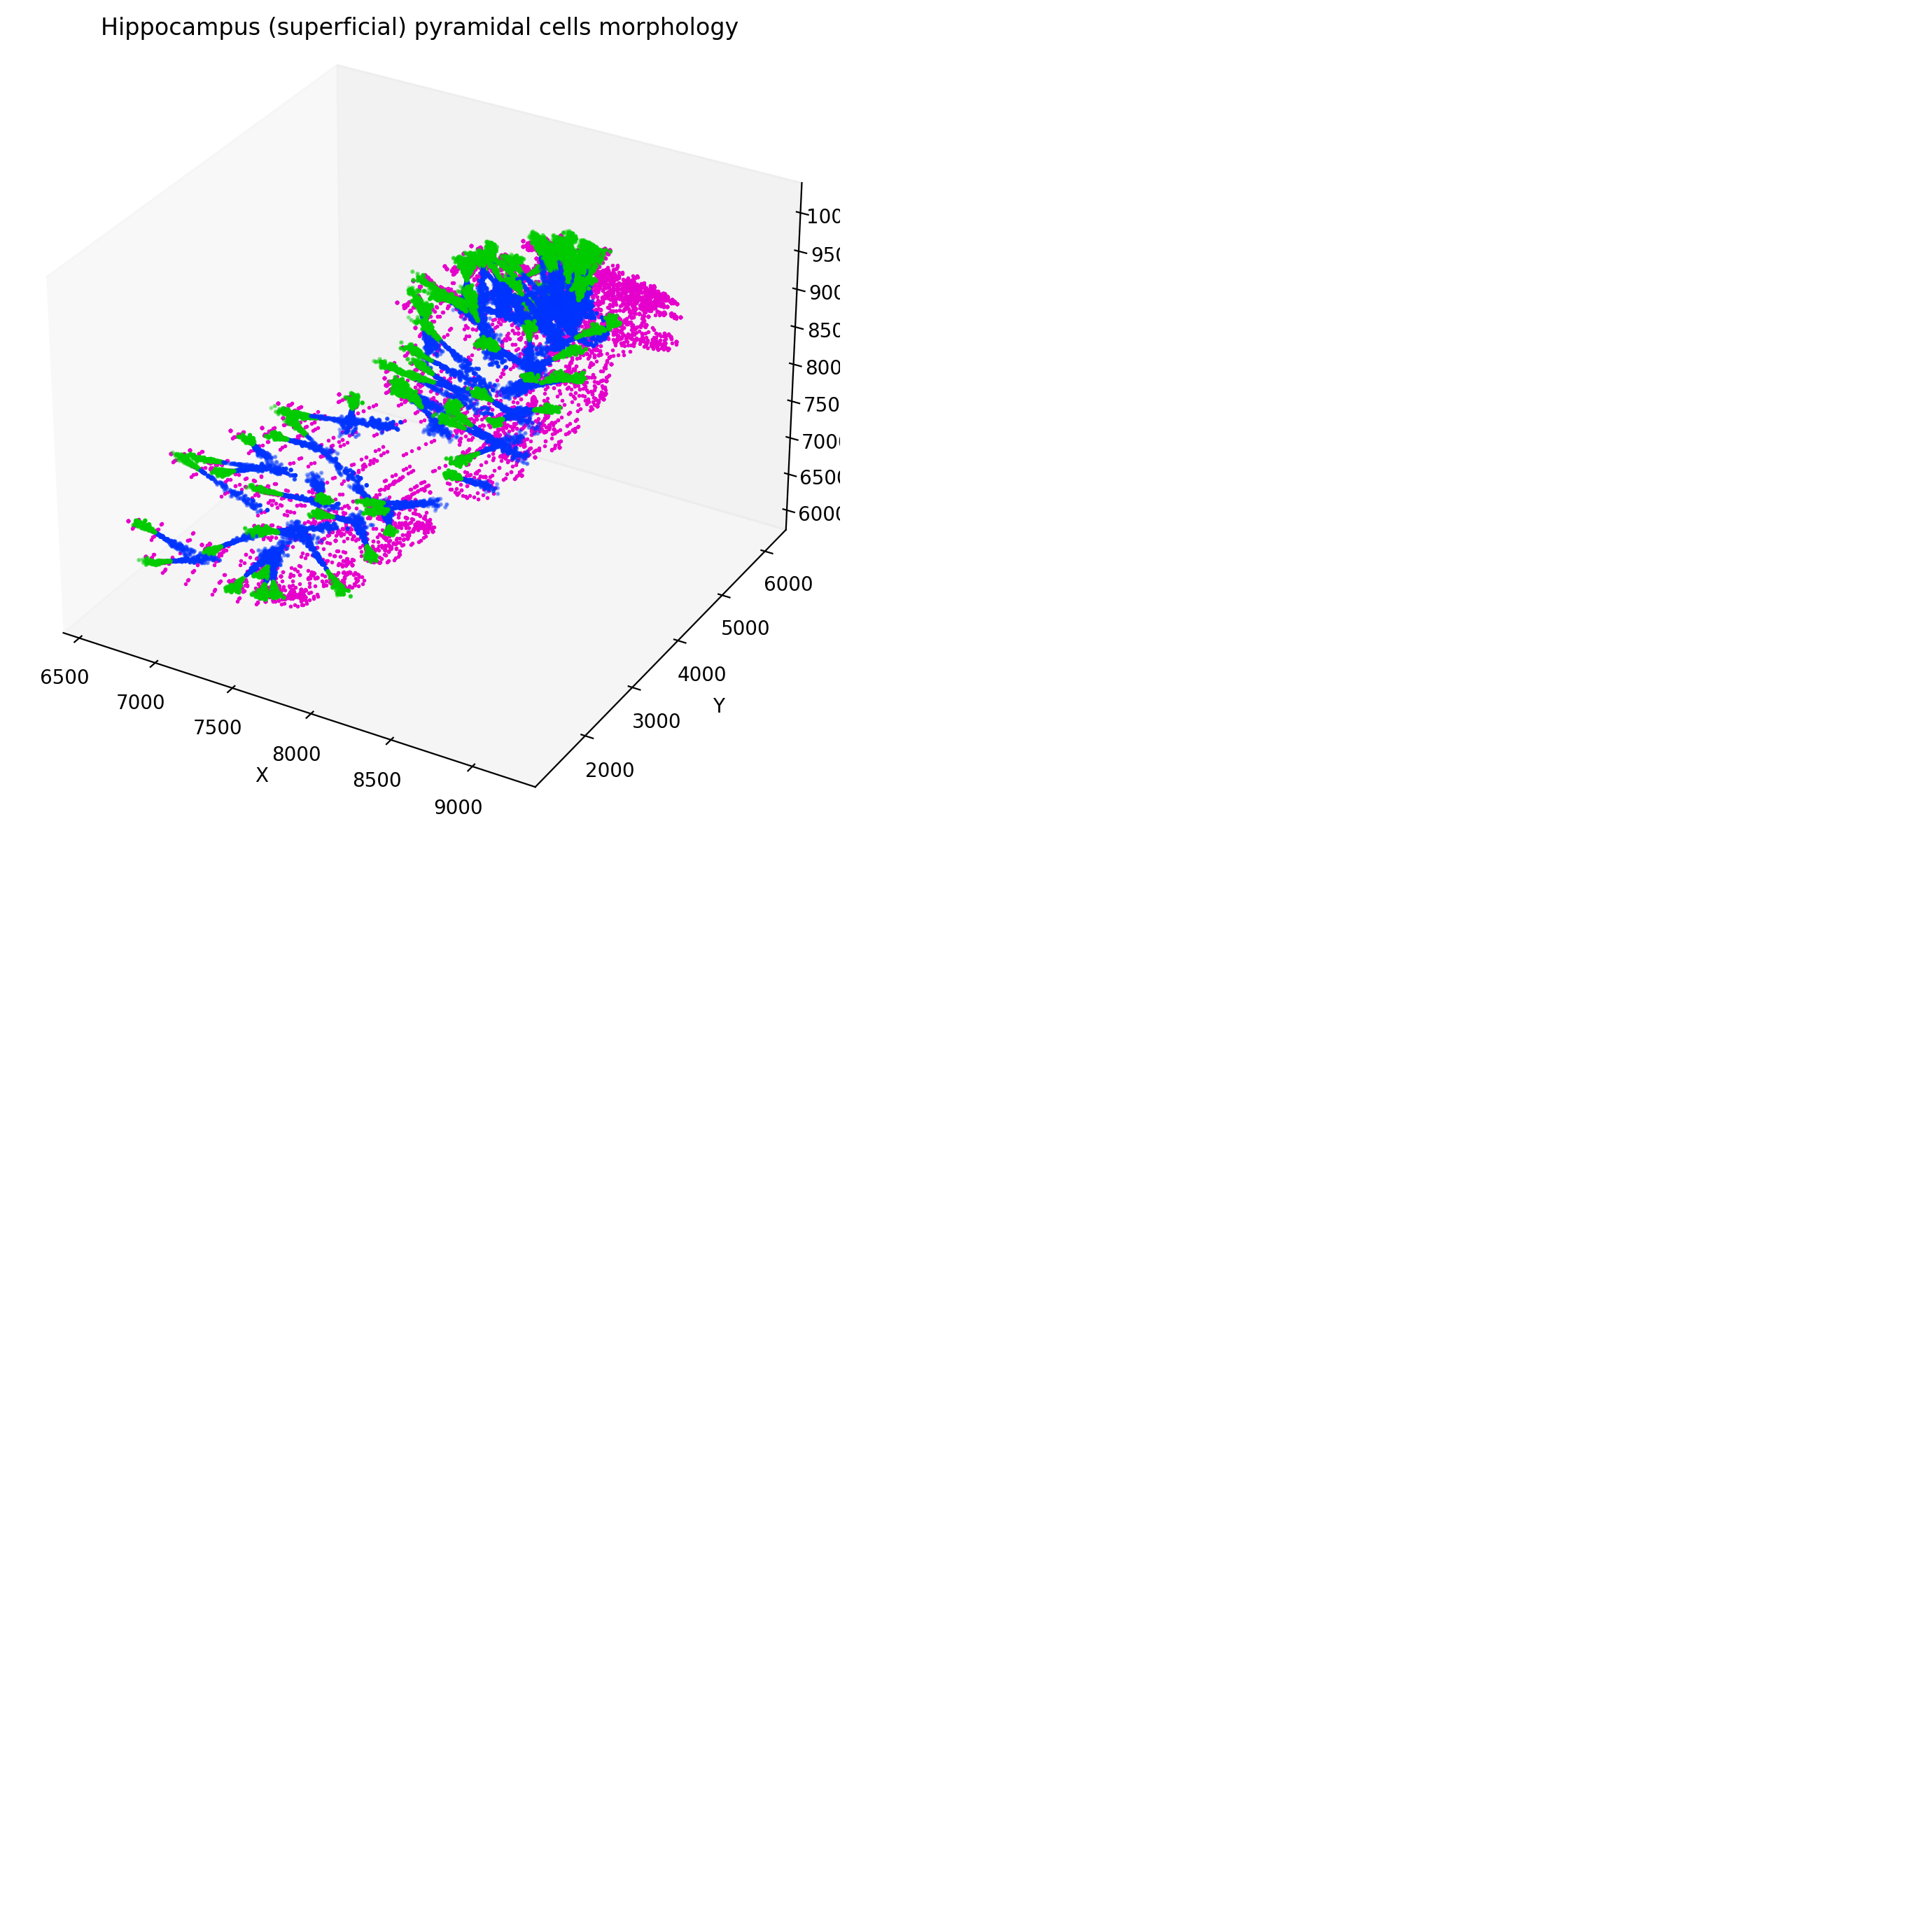

In [4]:
## PLOT SUPERFICIAL PYRAMIDAL MORPHOLOGY ##
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6)) 
ax = Axes3D(fig)

col = np.round(np.linspace(0,255,rP))
cmap = cm.jet 
for w in range(rP):
    ptsd = PyrS_M[w]['dendrite1']
    ax.scatter(ptsd[:,0], ptsd[:,1], ptsd[:,2], '.', color=[0, .8, 0], s=1.8  )
    ptsd2 = PyrS_M[w]['dendrite2']
    ax.scatter(ptsd2[:,0], ptsd2[:,1], ptsd2[:,2], '.', color=[0, .2, 1], s=1.8  )
        
    pts = PyrS_M[w]['axon1']
    ax.plot(pts[:,0], pts[:,1], pts[:,2], '.', c=[.9, 0, .8] , markersize=2 )
    
    pts2 = PyrS_M[w]['axon2']
    ax.plot(pts2[:,0], pts2[:,1], pts2[:,2], '.', c=[.9, 0, .8], markersize=2 )

fig.suptitle('Hippocampus (superficial) pyramidal cells morphology')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
plt.show()

***

# **Create Deep Pyramidal Morphology**
***

In [5]:
import numpy as np
import pandas as pd
import scipy.io
from scipy.spatial import ConvexHull
from itertools import product
import matplotlib.pyplot as plt
from matplotlib import cm

PyrD_features = scipy.io.loadmat('PyrD_features.mat')
PyrD_features_df = pd.DataFrame( PyrD_features['PyrD_features'])

ColumnNames = ['PlacementPyr_x', 'PlacementPyr_y', 'PlacementPyr_z', 
               'MinDistCA3', 'MinDistCA3_x', 'MinDistCA3_y', 'MinDistCA3_z',
               'MinDistSub', 'MinDistSub_x', 'MinDistSub_y', 'MinDistSub_z',
               'eigenv_ellips_l1', 'eigenv_ellips_l2', 'eigenv_ellips_l3',
               'H_BasalDend', 'r_BasalDend','H_ApicalDend', 'r_ApicalDend', 'nn',
               'MinDistOriens','MinDistOriens_x','MinDistOriens_y','MinDistOriens_z',
               'MinDistLacun','MinDistLacun_x','MinDistLacun_y','MinDistLacun_z']
PyrD_features_df.columns = ColumnNames

In [6]:
PyrD_features_df

,PlacementPyr_x,PlacementPyr_y,PlacementPyr_z,MinDistCA3,MinDistCA3_x,MinDistCA3_y,MinDistCA3_z,MinDistSub,MinDistSub_x,MinDistSub_y,...,r_ApicalDend,nn,MinDistOriens,MinDistOriens_x,MinDistOriens_y,MinDistOriens_z,MinDistLacun,MinDistLacun_x,MinDistLacun_y,MinDistLacun_z
0,7392.106934,1747.999878,6732.710449,890.852295,7059.520020,2480.439941,7115.509766,481.840271,7805.290039,1948.609985,...,75.934700,1.0,0.0,0.0,0.0,0.0,234.771942,7299.580078,1944.149902,6822.609375
1,7621.520020,1876.859863,8444.201172,628.380432,7357.609863,2436.050049,8332.309570,1056.485596,8534.780273,1838.369995,...,71.809219,2.0,0.0,0.0,0.0,0.0,327.164154,7824.839844,2055.999756,8260.880859
2,8242.309570,4284.031738,9922.581055,604.455139,7884.509766,4205.689941,9441.740234,976.706604,9181.580078,4373.419922,...,79.149597,3.0,0.0,0.0,0.0,0.0,449.711182,8482.290039,4196.378906,9552.491211
3,7902.299805,1866.799805,8285.681641,760.362732,7498.049805,2510.729980,8295.030273,733.929565,8534.780273,1838.369995,...,65.585480,4.0,0.0,0.0,0.0,0.0,158.995499,7922.120117,2017.859863,8240.210938
4,8585.219727,2023.969849,8492.821289,944.984985,8081.180176,2794.449951,8279.980469,253.315735,8810.830078,2034.680054,...,86.468346,5.0,0.0,0.0,0.0,0.0,252.800308,8631.629883,2248.109863,8385.511719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45403,8710.139648,3970.956787,9976.451172,927.806396,8133.100098,3930.250000,9251.059570,563.599426,9205.879883,3958.399902,...,67.252625,45404.0,0.0,0.0,0.0,0.0,479.555908,8534.519531,4050.527832,9537.361328
45404,8492.479492,1886.529907,8391.851562,993.687744,8043.640137,2757.699951,8227.469727,284.303741,8700.129883,1938.589966,...,69.881683,45405.0,0.0,0.0,0.0,0.0,329.694336,8392.959961,2137.069824,8202.051758
45405,7346.531738,1707.459839,6708.384277,919.362610,6983.200195,2498.370117,7004.490234,532.282715,7805.290039,1948.609985,...,73.362648,45406.0,0.0,0.0,0.0,0.0,266.971924,7299.580078,1944.149902,6822.609375
45406,6590.809570,1857.409912,6773.599121,324.349274,6431.700195,2124.780029,6865.250000,1213.702148,7727.000000,2113.169922,...,68.168320,45407.0,0.0,0.0,0.0,0.0,244.541473,6804.740723,1888.679810,6659.335449


In [7]:
'''
This function creates morphologies of deep pyramidal cells.
Axons are modelled as ellipsoids and dendrites as probability clouds distributed in a conic volume.
They are created by the DataFrame containing all the necessary features

It returns a dictionary with axonal and dendritic probability clouds for each pyramidal cell
'''

rP = np.size(PyrD_features_df,0) # number of pyramidal cells
rP = 100 # number of simulated cells

PyrD_M = {} ; Pyrtemp = {}

for w in range(rP):
    print('pyramidal cell n: ',w+1)
    PyrD_M[w] = {}
    
    
    #### CREATION OF FIRST ELLIPSOID ####
    
    #creation of the eigenvectors for ellipsoid projecting towards stratum oriens
    Dx = PyrD_features_df['eigenv_ellips_l1'][w]
    Dy = PyrD_features_df['eigenv_ellips_l2'][w]
    Dz = PyrD_features_df['eigenv_ellips_l3'][w]
    N = 8 # number of concentric ellipes defining ellipsoid
    D = np.zeros((3,3))
    D[0,0] = Dx**2; D[1,1] = Dy**2; D[2,2] = Dz**2;
    
    p1 = PyrD_features_df.loc[w, ['PlacementPyr_x', 'PlacementPyr_y', 'PlacementPyr_z'] ].values
    p2 = PyrD_features_df.loc[w, ['MinDistCA3_x', 'MinDistCA3_y', 'MinDistCA3_z'] ].values
    p3 = PyrD_features_df.loc[w, ['MinDistSub_x', 'MinDistSub_y', 'MinDistSub_z'] ].values
    por = PyrD_features_df.loc[w, ['MinDistOriens_x','MinDistOriens_y','MinDistOriens_z'] ].values
    plm = PyrD_features_df.loc[w, ['MinDistLacun_x','MinDistLacun_y','MinDistLacun_z'] ].values

    # create eigenvectors: semi-axes of the first ellipsoid (vx, vy, vz)
    # eigenvector vx : orientation from pyramidal towards subiculum
    vx = p3 - p1
    vx = vx / np.linalg.norm(vx,2)
    # vector vsub : from CA3 towards pyramidal
    vsub = p1 - p2
    vsub = vsub / np.linalg.norm(vsub,2)
    
    # vector vnorm : normal to (vx , vsub) plane 
    # vy : ellipses semi-axis
    vnorm = np.cross(vx,vsub)
    vnorm = vnorm / np.linalg.norm(vnorm,2)
    vy = vnorm
    # vz : normal to vx and vy
    vz = np.cross(vx,vy)
    V = np.stack((vx, vy, vz), axis=1)
    Q = np.dot(V,np.dot(D,V.T))
    (A,V) = np.linalg.eig(Q)
    
    s = np.argsort(A)
    D = np.sort(A)
    V = V[:,s]; D = np.real(D)
    uv = np.arange(-1,1+2/(N-1),2/(N-1))
    u,v = np.meshgrid( uv *np.pi/2, uv *np.pi )
    
    # x,y,z for definition of concentric ellipses
    x = D[0]**.5 * np.cos(u) * np.cos(v)
    y = D[1]**.5 * np.cos(u) * np.sin(v)
    z = D[2]**.5 * np.sin(u)
    
    # shift vector to mode ellipsoid so that  pyramidal cell placement is inside the ellipsoid 
    Vshift = 0.85 * Dx * vx
     
    # temporary coordinates of ellipsoid center
    qtemp = np.zeros(3)
    qtemp[0] = p1[0] + Vshift[0]
    qtemp[1] = p1[1] + Vshift[1]
    qtemp[2] = p1[2] + Vshift[2]
    xx = np.zeros((N,N)); yy = np.zeros((N,N)); zz = np.zeros((N,N));
    for k,j in product( range(len(x)), range(len(x)) ): 
            point = - np.dot( V, np.vstack([x[k,j], y[k,j], z[k,j]]) )
            xx[k,j] = point[0] + qtemp[0]
            yy[k,j] = point[1] + qtemp[1]
            zz[k,j] = point[2] + qtemp[2]

  
    # allocate in (axon1) the coordinates of first axonal cloud 
    P = np.hstack([ np.reshape(xx,(-1,1)) , np.reshape(yy,(-1,1)) , np.reshape(zz,(-1,1)) ])
    P = np.hstack([ P , np.ones((np.size(P,0),1)) * w ])  
    PyrD_M[w]['AXON'] = P
    
    #### CREATE COORDINATES OF BASAL AND APICAL DENDRITES ####
    
    # u and v are parallel to the axon travelling towards subiculum 
    u = vx
    v = vy
    vlm = plm - p1
    vlm = vlm / np.linalg.norm(vlm,2)
    Dlm = PyrD_features_df['MinDistLacun'][w]

    # cone1 is the BASAL one (the upper, shorter and larger, inserted in stratum oriens)
    # cone2 is the APICAL one (the lower, longer and narrowe, inserted in stratum radiatum)
    H1 = PyrD_features_df['H_BasalDend'][w]
    H2 = PyrD_features_df['H_ApicalDend'][w]
    Vcone1 = H1 * vlm
    Vcone2 = H2 * vlm
    
    O = PyrD_features_df.loc[w, ['PlacementPyr_x','PlacementPyr_y','PlacementPyr_z']].values #cone origin
    
    P1 = np.zeros(3); P2 = np.zeros(3);
    P1[0] = O[0] + Vcone1[0] # origin of cone1 circular base
    P1[1] = O[1] + Vcone1[1]
    P1[2] = O[2] + Vcone1[2]
    P2[0] = O[0] - Vcone2[0] # origin of cone2 circular base
    P2[1] = O[1] - Vcone2[1]
    P2[2] = O[2] - Vcone2[2]

    d1 = np.hstack([O[0] - P1[0] , O[1] - P1[1] , O[2] - P1[2] ])
    d2 = np.hstack([O[0] - P2[0] , O[1] - P2[1] , O[2] - P2[2] ])
    N = 100 # number of points for the description of cross section (volume)
    theta = np.random.rand(N,1) * 2 * np.pi
    h1 = np.random.rand(N,1) * H1
    h2 = np.random.rand(N,1) * H2
    R1 = np.random.rand(N,1) * PyrD_features_df['r_BasalDend'][w] 
    R2 = np.random.rand(N,1) * PyrD_features_df['r_ApicalDend'][w]    

    x1 = O[0] + (h1/H1)*d1[0] + R1*(h1/H1)*np.cos(theta)*u[0] + R1*(h1/H1)*np.sin(theta)*v[0]
    y1 = O[1] + (h1/H1)*d1[1] + R1*(h1/H1)*np.cos(theta)*u[1] + R1*(h1/H1)*np.sin(theta)*v[1]
    z1 = O[2] + (h1/H1)*d1[2] + R1*(h1/H1)*np.cos(theta)*u[2] + R1*(h1/H1)*np.sin(theta)*v[2]
    x2 = O[0] + (h2/H2)*d2[0] + R2*(h2/H2)*np.cos(theta)*u[0] + R2*(h2/H2)*np.sin(theta)*v[0]
    y2 = O[1] + (h2/H2)*d2[1] + R2*(h2/H2)*np.cos(theta)*u[1] + R2*(h2/H2)*np.sin(theta)*v[1]
    z2 = O[2] + (h2/H2)*d2[2] + R2*(h2/H2)*np.cos(theta)*u[2] + R2*(h2/H2)*np.sin(theta)*v[2]

    
    # allocate in (dendrite1) and (dendrite2) the coordinates of basal and apical dendrites. 
    # allocate in (DENDRITES) all the dendrites
    Pyrtemp[w] = {}
    Pyrtemp[w]['dendrite1'] = np.hstack([ x1 , y1 , z1, np.ones((len(x1),1))*w ])
    Pyrtemp[w]['dendrite2'] = np.hstack([ x2 , y2 , z2, np.ones((len(x2),1))*w ])
    PyrD_M[w]['DENDRITES'] = np.vstack([ Pyrtemp[w]['dendrite1'] , Pyrtemp[w]['dendrite2'] ])
    PyrD_M[w]['dendrite1'] = Pyrtemp[w]['dendrite1']                                    
    PyrD_M[w]['dendrite2'] = Pyrtemp[w]['dendrite2']  
    
    # convex hull or convex envelope of a shape is the smallest convex set that contains it
    PyrD_M[w]['AXONShull'] = ConvexHull( PyrD_M[w]['AXON'][:,0:3] )

pyramidal cell n:  1
pyramidal cell n:  2
pyramidal cell n:  3
pyramidal cell n:  4
pyramidal cell n:  5
pyramidal cell n:  6
pyramidal cell n:  7
pyramidal cell n:  8
pyramidal cell n:  9
pyramidal cell n:  10
pyramidal cell n:  11
pyramidal cell n:  12
pyramidal cell n:  13
pyramidal cell n:  14
pyramidal cell n:  15
pyramidal cell n:  16
pyramidal cell n:  17
pyramidal cell n:  18
pyramidal cell n:  19
pyramidal cell n:  20
pyramidal cell n:  21
pyramidal cell n:  22
pyramidal cell n:  23
pyramidal cell n:  24
pyramidal cell n:  25
pyramidal cell n:  26
pyramidal cell n:  27
pyramidal cell n:  28
pyramidal cell n:  29
pyramidal cell n:  30
pyramidal cell n:  31
pyramidal cell n:  32
pyramidal cell n:  33
pyramidal cell n:  34
pyramidal cell n:  35
pyramidal cell n:  36
pyramidal cell n:  37
pyramidal cell n:  38
pyramidal cell n:  39
pyramidal cell n:  40
pyramidal cell n:  41
pyramidal cell n:  42
pyramidal cell n:  43
pyramidal cell n:  44
pyramidal cell n:  45
pyramidal cell n:  

<IPython.core.display.Javascript object>


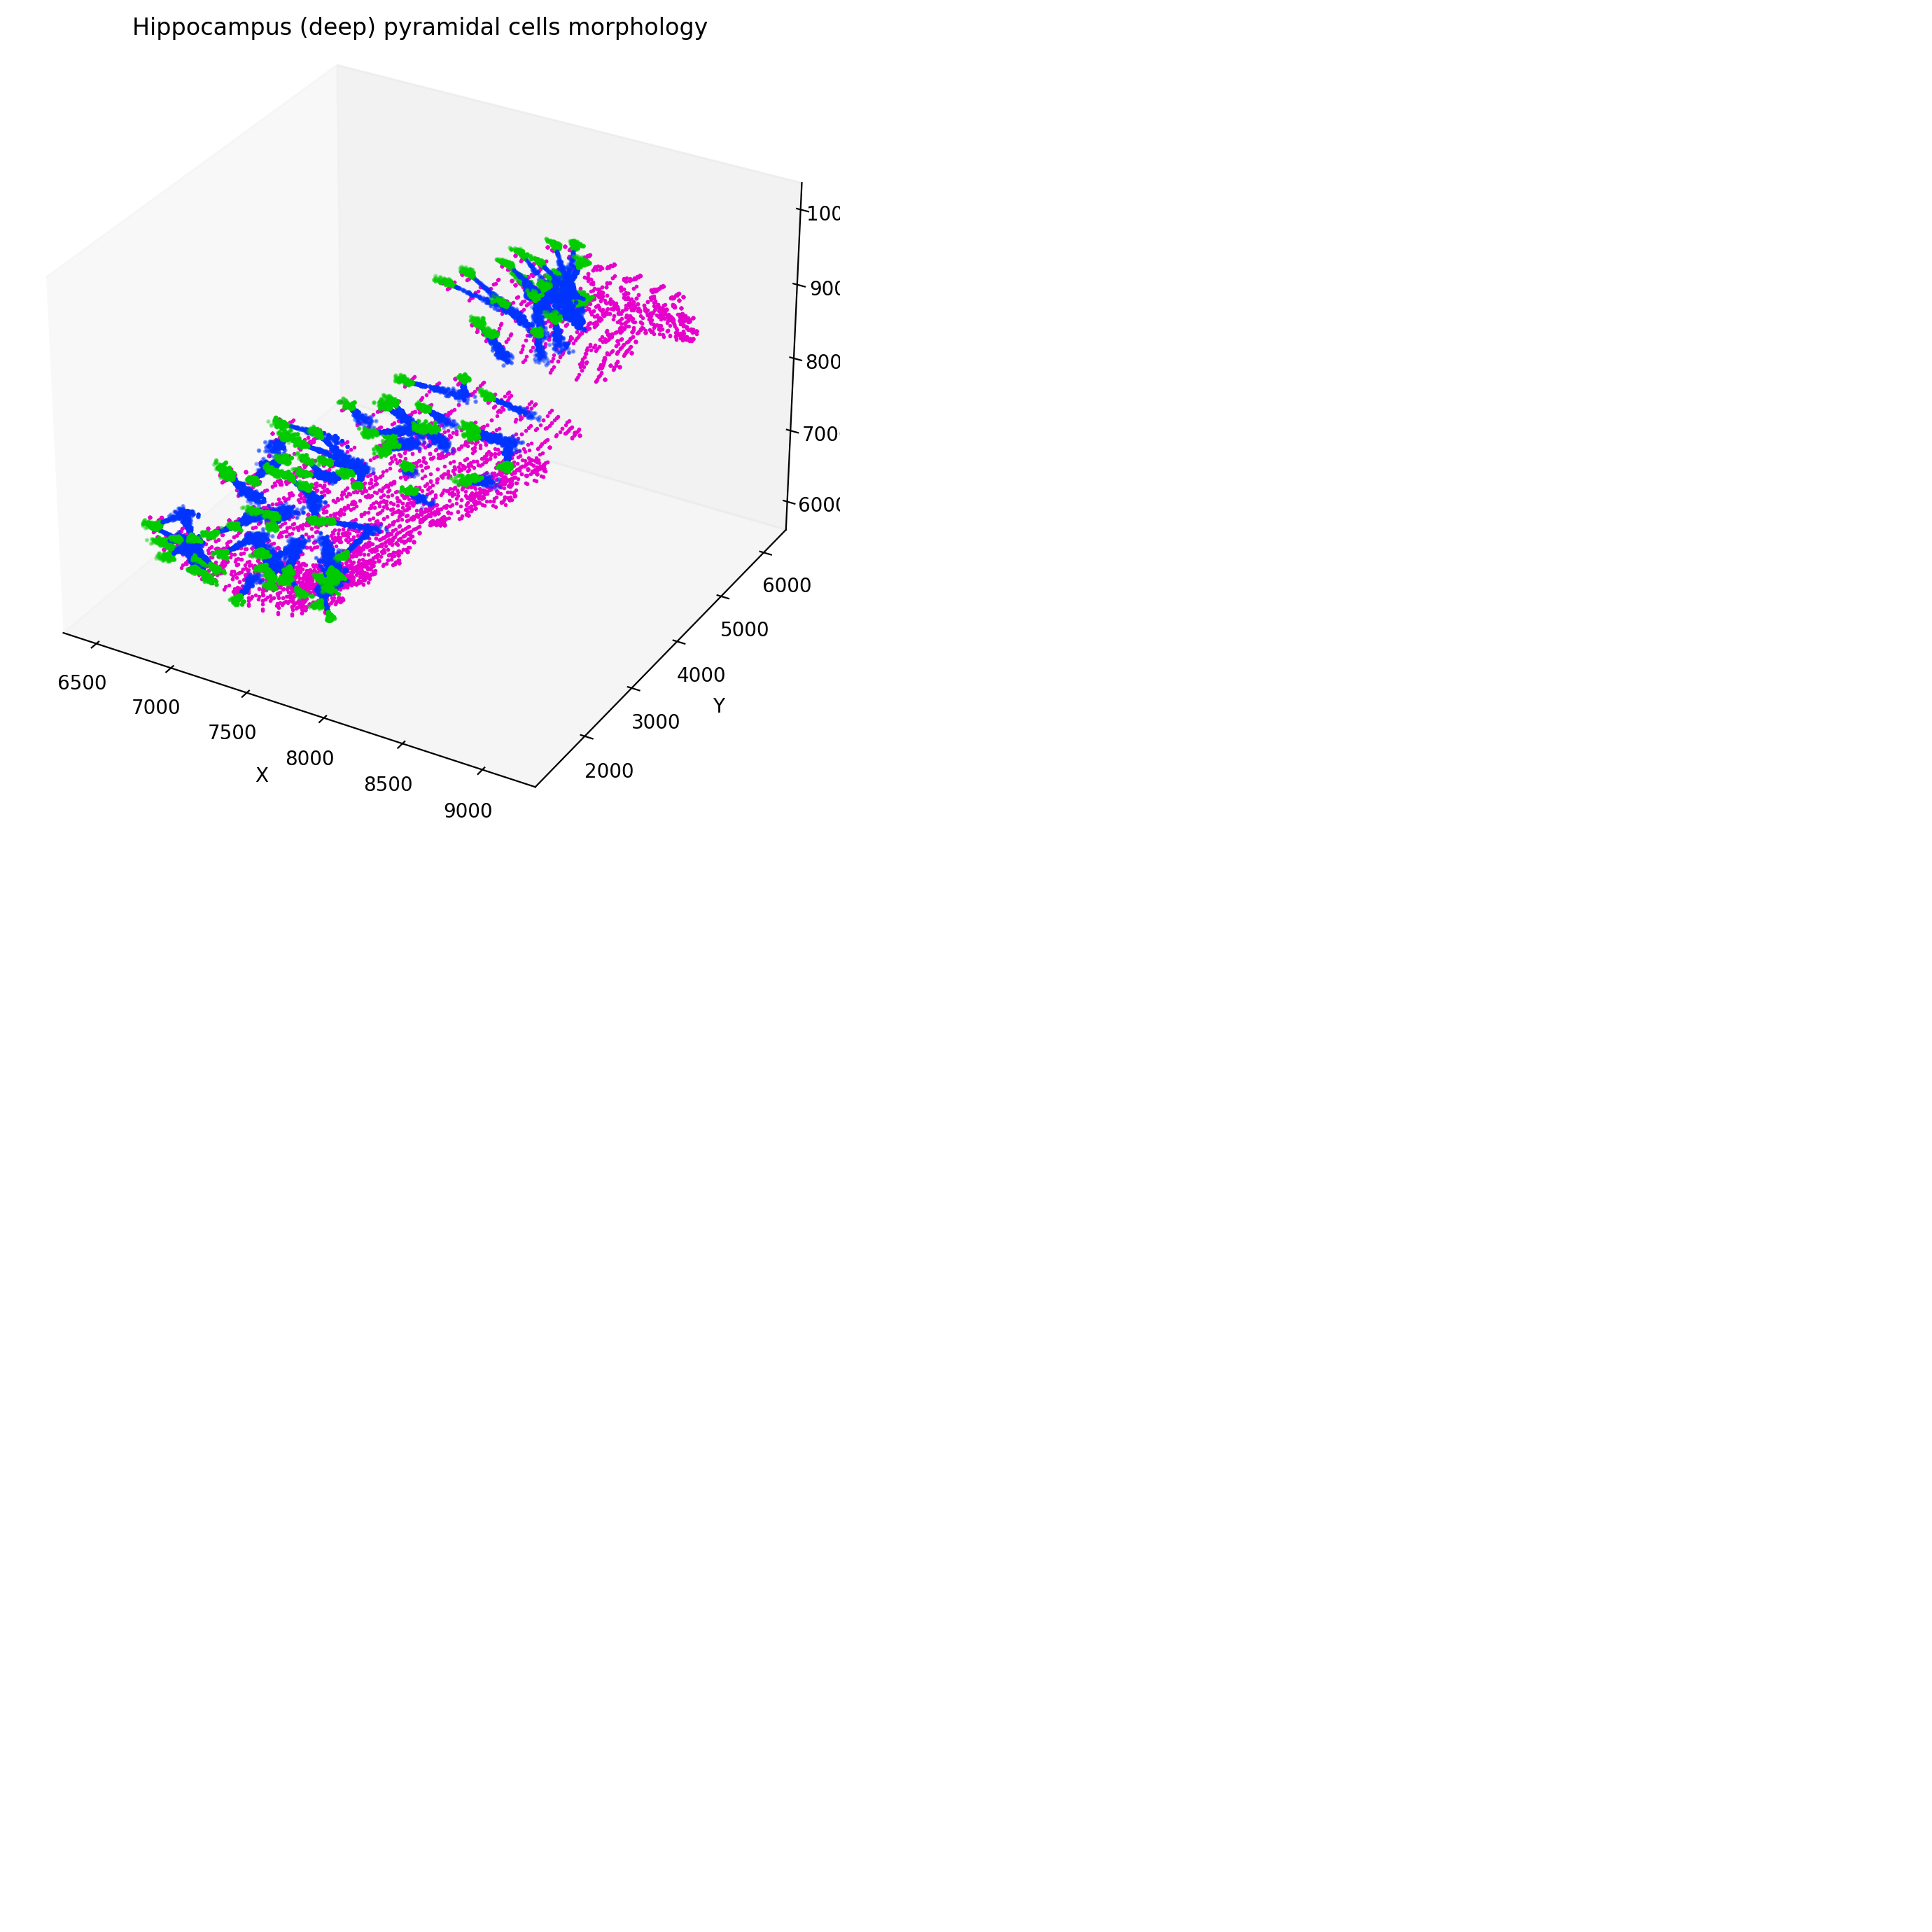

In [8]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6)) 
ax = Axes3D(fig)

col = np.round(np.linspace(0,255,rP))
cmap = cm.jet 
for w in range(rP):
    ptsd = PyrD_M[w]['dendrite1']
    ax.scatter(ptsd[:,0], ptsd[:,1], ptsd[:,2], '.', color=[0, .8, 0], s=1.8  )
    ptsd2 = PyrD_M[w]['dendrite2']
    ax.scatter(ptsd2[:,0], ptsd2[:,1], ptsd2[:,2], '.', color=[0, .2, 1], s=1.8  )
        
    pts = PyrD_M[w]['AXON']
    ax.plot(pts[:,0], pts[:,1], pts[:,2], '.', c=[.9, 0, .8] , markersize=2 )

fig.suptitle('Hippocampus (deep) pyramidal cells morphology')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
plt.show()

<IPython.core.display.Javascript object>


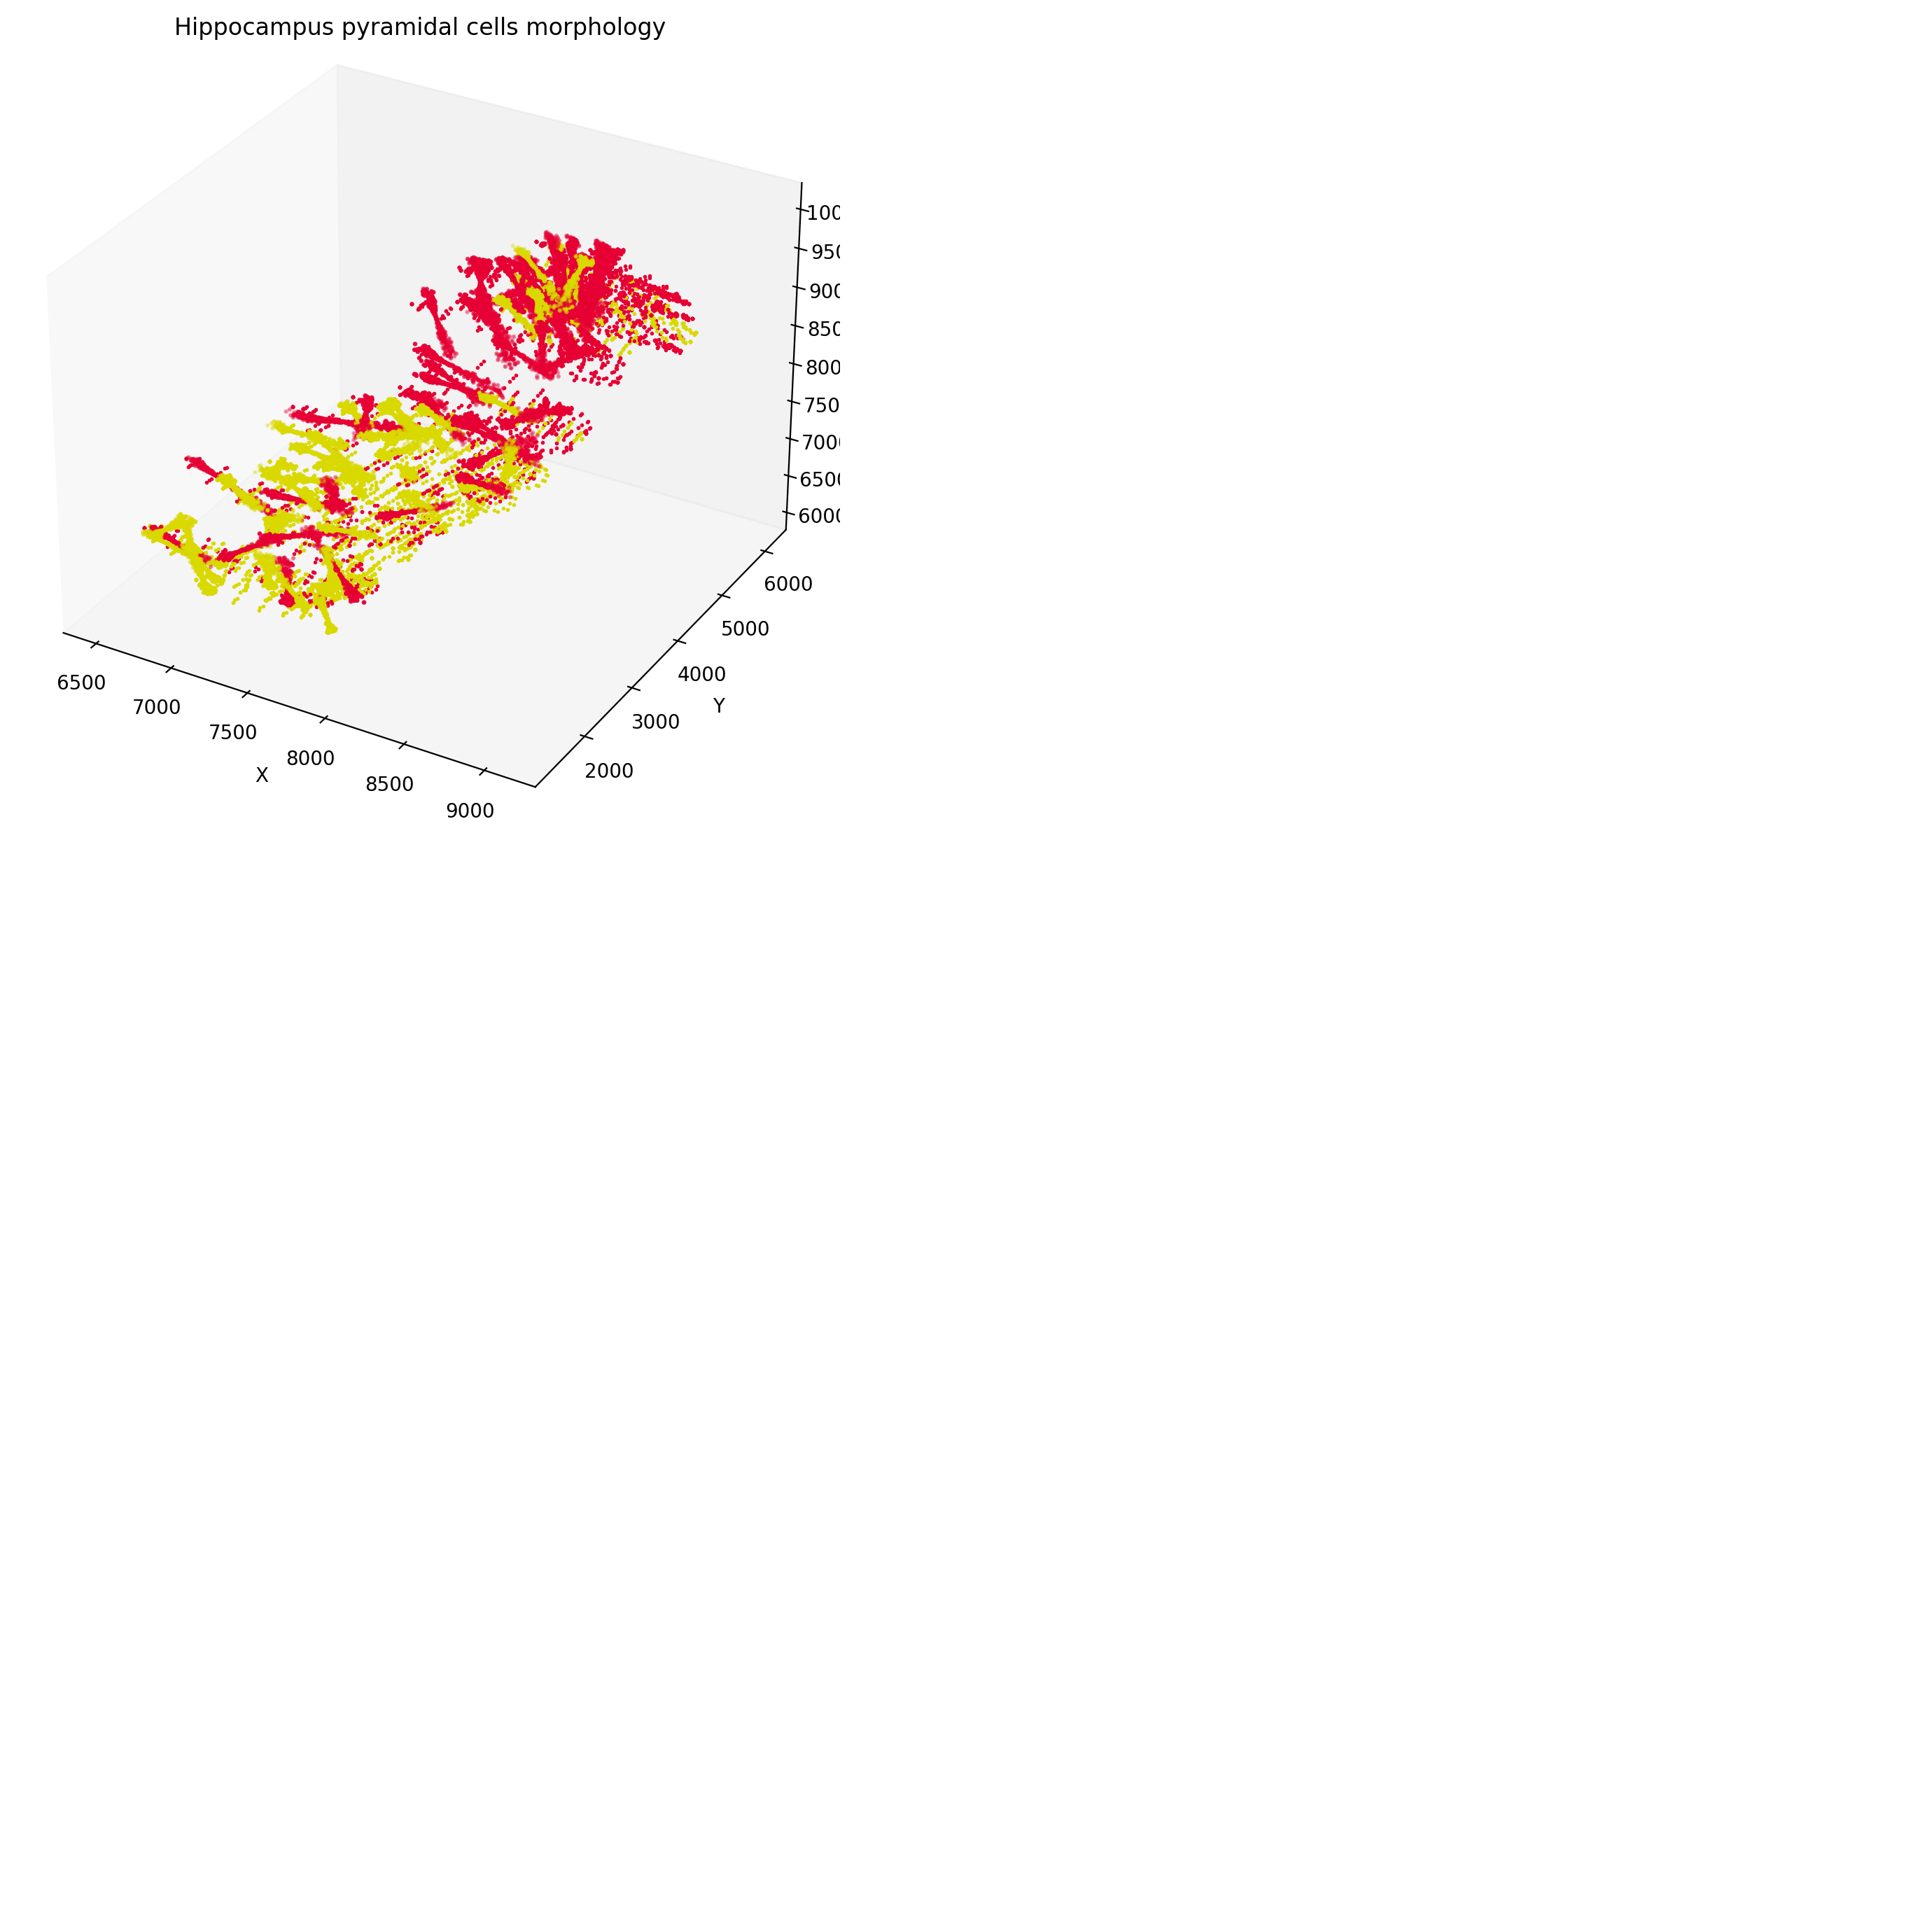

In [8]:
# deep vs superficial pyramidal cells
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6)) 
ax = Axes3D(fig)

col = np.round(np.linspace(0,255,rP))
cmap = cm.jet 
for w in range(50):
    
    ### DEEP (yellow)
    ptsd = PyrD_M[w]['DENDRITES']
    ax.scatter(ptsd[:,0], ptsd[:,1], ptsd[:,2], '.', color=[.85, .85, 0], s=1.8  )
        
    pts = PyrD_M[w]['AXON']
    ax.plot(pts[:,0], pts[:,1], pts[:,2], '.', c=[.85, .85, 0] , markersize=2 )
    
    ### SUPERFICIAL (red)
    ptsd = PyrS_M[w]['DENDRITES']
    ax.scatter(ptsd[:,0], ptsd[:,1], ptsd[:,2], '.', color=[.9, 0, .2], s=2  )
        
    pts = PyrS_M[w]['axon1']
    ax.plot(pts[:,0], pts[:,1], pts[:,2], '.', c=[.9, 0, .2] , markersize=2 )
    
    pts2 = PyrS_M[w]['axon2']
    ax.plot(pts2[:,0], pts2[:,1], pts2[:,2], '.', c=[.9, 0, .2], markersize=2 )

fig.suptitle('Hippocampus pyramidal cells morphology')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
plt.show()

<IPython.core.display.Javascript object>


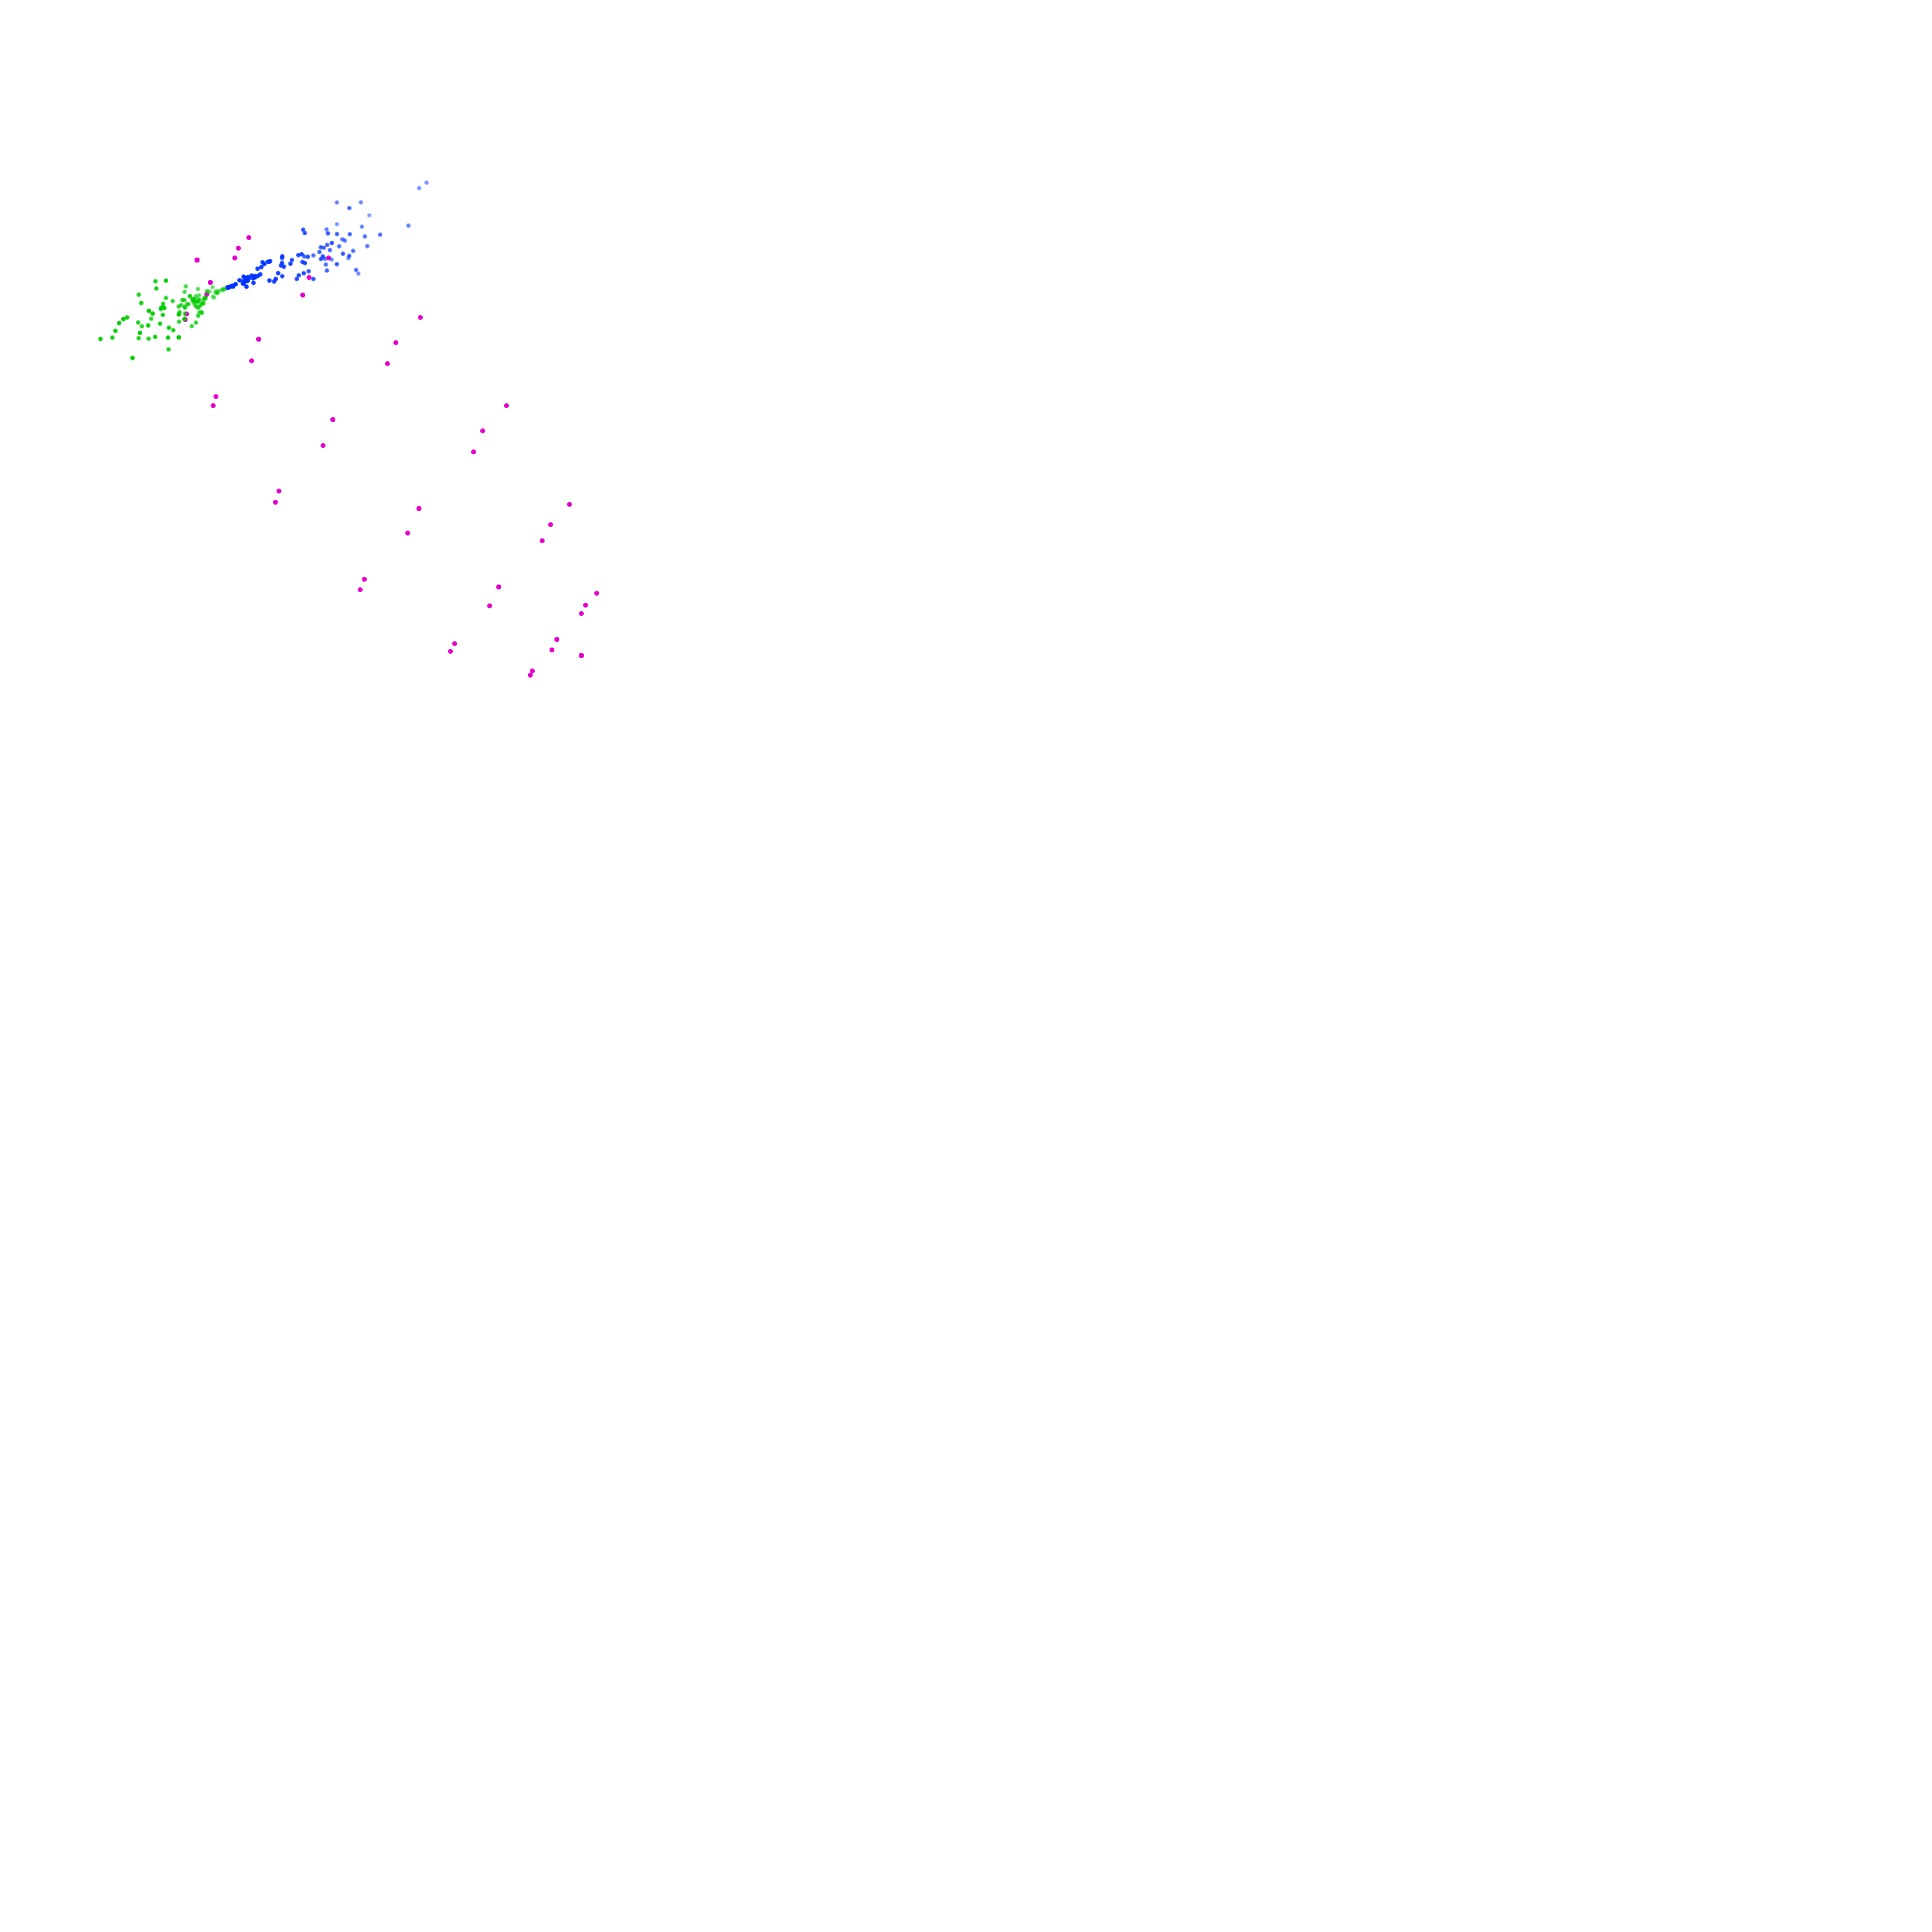

In [10]:
# plot single pyramidal cell
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6)) 
ax = Axes3D(fig)

col = np.round(np.linspace(0,255,rP))
cmap = cm.jet 

w=3

ptsd = PyrD_M[w]['dendrite1']
ax.scatter(ptsd[:,0], ptsd[:,1], ptsd[:,2], '.', color=[0, .8, 0], s=1.8  )
ptsd2 = PyrD_M[w]['dendrite2']
ax.scatter(ptsd2[:,0], ptsd2[:,1], ptsd2[:,2], '.', color=[0, .2, 1], s=1.8  )

pts = PyrD_M[w]['AXON']
ax.plot(pts[:,0], pts[:,1], pts[:,2], '.', c=[.9, 0, .8] , markersize=3 )
#for simplex in PyrD_M[w]['AXONShull'].simplices:
#        ax.plot(pts[simplex,0], pts[simplex,1], pts[simplex,2], '-k',  lw=.5)
    
ax.set_axis_off()

plt.show()

In [ ]:
#df = pd.DataFrame(PyrS_M)
#df